In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [2]:
# Get CSV File elements
data = pd.read_csv('CSV_Files/diabetes.csv') 

In [3]:
# To find the value of Columns 
for i in data.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [4]:
# Head of Diabetes.csv
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# To Show Number of rows and Columns
data.shape

(768, 9)

In [6]:
# To get Statistical Data of the file
data.describe  # data.describe()

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [7]:
# To get Output details with count
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Here 0 Describe No-Diabetic and 1 Describe Diabetic
print(data['Outcome'].mean()) # Provide mean of Outcome column
print(data['BloodPressure'].mean() )# Provide mean of BloodPressure column

0.3489583333333333
69.10546875


In [9]:
# Mean of every value split by outcome
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
# Splitting over data and label X and Y Where Y is Outcome and X is other than Outcome
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome']

In [11]:
# To Track the value of X which holds other than Outcome
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
# To Track the value of Y which holds only Outcome
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
# Train Dataset with labels X and Y with test_size as 0.4
train = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
train_X=train[0]
test_X=train[1]
train_Y=train[2]
test_Y=train[3]
print(train)

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
619            0      119              0              0        0  32.4   
329            6      105             70             32       68  30.8   
13             1      189             60             23      846  30.1   
476            2      105             80             45      191  33.7   
45             0      180             66             39        0  42.0   
..           ...      ...            ...            ...      ...   ...   
303            5      115             98              0        0  52.9   
592            3      132             80              0        0  34.4   
559           11       85             74              0        0  30.1   
725            4      112             78             40        0  39.4   
253            0       86             68             32        0  35.8   

     DiabetesPedigreeFunction  Age  
619                     0.141   24  
329                     0.122   37  

In [14]:
print(X.shape)

# For the label X
print(train[0].shape)
print(train[1].shape)

# For the label Y
print(train[2].shape)
print(train[3].shape)

(768, 8)
(614, 8)
(154, 8)
(614,)
(154,)


In [15]:
# check the splitted train and test data
print(train_X.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
619            0      119              0              0        0  32.4   
329            6      105             70             32       68  30.8   
13             1      189             60             23      846  30.1   
476            2      105             80             45      191  33.7   
45             0      180             66             39        0  42.0   

     DiabetesPedigreeFunction  Age  
619                     0.141   24  
329                     0.122   37  
13                      0.398   59  
476                     0.711   29  
45                      1.893   25  


In [16]:
print(test_X.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
615            3      106             72              0        0  25.8   
80             3      113             44             13        0  22.4   
148            5      147             78              0        0  33.7   
132            3      170             64             37      225  34.5   
501            3       84             72             32        0  37.2   

     DiabetesPedigreeFunction  Age  
615                     0.207   27  
80                      0.140   22  
148                     0.218   65  
132                     0.356   30  
501                     0.267   28  


In [17]:
print(train_Y.head())

619    1
329    0
13     1
476    1
45     1
Name: Outcome, dtype: int64


In [18]:
print(test_Y.head())

615    0
80     0
148    0
132    1
501    0
Name: Outcome, dtype: int64


In [19]:
#Standardize the data
scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [20]:
# Implementation of Gradient Boosting Classifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=2)
classifier.fit(train_X, train_Y) # Fit the trained data


# Accuracy score on the test data
X_test_prediction = classifier.predict(test_X)
test_data_accuracy = accuracy_score(X_test_prediction, test_Y)
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.7532467532467533


In [21]:
# Accuracy score on the training data
train_predictions = classifier.predict(train_X)
training_data_accuracy = accuracy_score(train_predictions, train_Y)
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.8697068403908795


In [22]:
# Accuracy score on the test data
test_predictions = classifier.predict(test_X)
test_data_accuracy = accuracy_score(test_predictions, test_Y)
print('Accuracy score on the test data:', test_data_accuracy)

Accuracy score on the test data: 0.7532467532467533


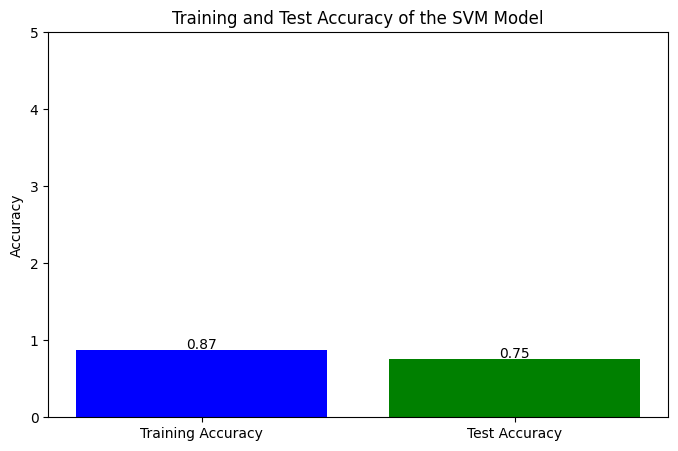

In [23]:
# Data for plotting
accuracy_data = {
    'Training Accuracy': training_data_accuracy,
    'Test Accuracy': test_data_accuracy
}

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(accuracy_data.keys(), accuracy_data.values(), color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of the SVM Model')
plt.ylim(0, 5)  # Set y-axis limit to range [0, 5]

# Display the bar values on top of the bars
for key, value in accuracy_data.items():
    plt.text(key, value + 0.02, f'{value:.2f}', ha='center')

plt.show()

In [24]:
# Ignore the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Prediction form the requrired input
input_data=(9,57,80,37,0,32.8,0.096,41)

# Reshape the given input
new_data_point = np.array(input_data).reshape(1, -1)

# Assuming the features in new_data_point are in the same order as your training data
prediction = classifier.predict(new_data_point)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')
    

The person is not diabetic


In [25]:
import pickle

# Create a file and write the classifier which in binary form
filename = 'Diabetes_Model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

# load the saved model
loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))

In [26]:
# Ignore the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Prediction form the requrired input
input_data=(4,114,65,0,0,21.9,0.432,37)

# Reshape the given input
new_data_point = np.array(input_data).reshape(1, -1)

# Assuming the features in new_data_point are in the same order as your training data
prediction = classifier.predict(new_data_point)


if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic
